In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from urllib.request import urlretrieve
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[2],
                    'pcm-avg-temp': values[3],
                    'iters-per-timestep': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[8],
                    'nussult-number-nshadow': values[6],
                    'nusult-number': values[7],
                    'flux-combined': values[9],
                    'heat-storage-rate-flux': values[10],
                    'htf-avg-temp': values[11]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = 'base1.out'  # Replace with your text file path
output_file_path = 'simulation_report_base1.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file2= pd.read_csv('simulation_report_base1.csv')

print(f"Data has been written to {output_file_path}")
my_file2
      


Data has been written to simulation_report_base1.csv


,Time Step,flow-time,area-q,pcm-avg-temp,iters-per-timestep,heat-storage-rate,temp-uniformity-index,nussult-number-nshadow,nusult-number,flux-combined,heat-storage-rate-flux,htf-avg-temp
0,"(""Time","Step""","""flow-time""","""area-q""","""pcm-avg-temp""","""iters-per-timestep""","""nusult-number""","""heat-storage-rate""","""nussult-number-nshadow""","""temp-uniformity-index""","""flux-combined""","""heat-storage-rate-flux"""
1,0,0,0,300,10,0,0,0,0,0,0,300.0000000000001
2,1,0.1,0,300.0014559368333,47,1532.475527184208,0.000192557212282165,44.90921989356358,22.45460994678179,-0.001866644311419918,30.75629740324894,302.3752004477129
3,2,0.2,0,300.0054672777745,47,2776.026867864234,0.001106577861081909,78.52314340921797,39.26157170460898,0.002626908793885718,57.71688331693058,304.6772487371032
4,3,0.3,0,300.0095721494073,47,3588.158210672301,0.002280496728285385,98.73620806979491,49.36810403489745,-0.004953730458453265,76.02305242904269,306.1787877455009
...,...,...,...,...,...,...,...,...,...,...,...,...
26326,26325,2632.5,1,352.4955101868293,1,0.03531037054872611,0.4607384264631477,-1607.067953835333,-803.5339769176665,1.372173392744092e-06,0.2082543483741474,352.9936810901014
26327,26326,2632.6,1,352.4956520999597,1,0.03513408050901659,0.4606620813049478,-1607.072718911713,-803.5363594558564,-2.330405676209679e-06,0.2081763492377479,352.9936832298428
26328,26327,2632.7,1,352.4957939623754,1,0.03531907158606875,0.4605857454817088,-1607.130050983656,-803.5650254918281,1.312591431074095e-06,0.2081068732844476,352.9936854071997
26329,26328,2632.8,1,352.4959357741337,1,0.03521415961016775,0.4605094191244711,-1607.128558803515,-803.5642794017574,-2.17234581881276e-06,0.2080302917968028,352.9936875396892


In [3]:

my_file2= my_file2.iloc[1:].reset_index(drop=True)

my_file2['flow-time']= my_file2['flow-time'].astype(float)
my_file2['area-q']= my_file2['area-q'].astype(float)

my_file2['Time Step']= my_file2['Time Step'].astype(float)
my_file2['pcm-avg-temp']= my_file2['pcm-avg-temp'].astype(float)
my_file2['heat-storage-rate']= my_file2['heat-storage-rate'].astype(float)
my_file2['temp-uniformity-index']= my_file2['temp-uniformity-index'].astype(float)
my_file2['nussult-number-nshadow']= my_file2['nussult-number-nshadow'].astype(float)
my_file2['nusult-number']= my_file2['nusult-number'].astype(float)
my_file2['flux-combined']= my_file2['flux-combined'].astype(float)
my_file2['heat-storage-rate-flux']= my_file2['heat-storage-rate-flux'].astype(float)
my_file2['htf-avg-temp']= my_file2['htf-avg-temp'].astype(float)
my_file2= my_file2[my_file2['area-q'] < 1]
my_file2['heat-storage-rate-avg']= my_file2['heat-storage-rate-flux'].cumsum()/my_file2['Time Step']
my_file2['temp-diff'] = my_file2['htf-avg-temp'] - my_file2['pcm-avg-temp']
my_file2['mean temp diff'] =my_file2['temp-diff'].cumsum()/my_file2['Time Step']

my_file2

,Time Step,flow-time,area-q,pcm-avg-temp,iters-per-timestep,heat-storage-rate,temp-uniformity-index,nussult-number-nshadow,nusult-number,flux-combined,heat-storage-rate-flux,htf-avg-temp,heat-storage-rate-avg,temp-diff,mean temp diff
0,0.0,0.0,0.0,300.000000,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN,1.136868e-13,inf
1,1.0,0.1,0.0,300.001456,47,1532.475527,0.000193,44.909220,22.454610,-0.001867,30.756297,302.375200,30.756297,2.373745e+00,2.373745
2,2.0,0.2,0.0,300.005467,47,2776.026868,0.001107,78.523143,39.261572,0.002627,57.716883,304.677249,44.236590,4.671781e+00,3.522763
3,3.0,0.3,0.0,300.009572,47,3588.158211,0.002280,98.736208,49.368104,-0.004954,76.023052,306.178788,54.832078,6.169216e+00,4.404914
4,4.0,0.4,0.0,300.017278,47,4591.045101,0.005051,120.716283,60.358141,0.004081,99.658314,308.138069,66.038637,8.120792e+00,5.333883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23399,23399.0,2339.9,1.0,351.710701,1,0.128040,0.673578,-1458.717464,-729.358732,0.000005,0.684538,352.980405,8.164672,1.269704e+00,12.727431
23400,23400.0,2340.0,1.0,351.711166,1,0.127016,0.673510,-1458.785342,-729.392671,-0.000007,0.684242,352.980412,8.164353,1.269246e+00,12.726942
23401,23401.0,2340.1,1.0,351.711631,1,0.127880,0.673441,-1458.873835,-729.436918,0.000006,0.683985,352.980420,8.164033,1.268789e+00,12.726452
23402,23402.0,2340.2,1.0,351.712096,1,0.126719,0.673372,-1458.944834,-729.472417,-0.000008,0.683687,352.980428,8.163713,1.268331e+00,12.725962


In [4]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = 'c2.out'  # Replace with your text file path
output_file_path = 'simulation_report_c1.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file4= pd.read_csv('simulation_report_c1.csv')

print(f"Data has been written to {output_file_path}")
my_file4
      


Data has been written to simulation_report_c1.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""iters-per-timestep""","""q""","""pcm-avg-temp""","""nussult-number""","""htf-avg-temp""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,299.9999999999998,0,0,0,0,299.9999999999996
2,1,0.1,0,300.0009070399414,-21.81102803683363,0.009566152621013025,15.64115828084126,0.000109408207613626,302.4535409927312
3,2,0.2,0,300.0035437109772,-40.95883680137728,0.03400390244844909,3.207454984163868,-0.00025346043148744,304.8574728852691
4,3,0.3,0,300.0063400356426,-55.48698053782268,0.05773532780464687,3.31382823708508,-2.917130220936315e-05,306.435229977335
...,...,...,...,...,...,...,...,...,...
36222,36221,3622.1,1,352.9653833114463,-0.01145402487477436,0.04218510753003531,3.439021727077945,7.267421381698669e-09,352.9996395549324
36223,36222,3622.2,1,352.965391054523,-0.01145137143726032,0.04217687664564186,3.439122126870641,7.353562543610526e-09,352.9996396367257
36224,36223,3622.3,1,352.9653987958116,-0.01144871484518041,0.0421686462251958,3.439188926614145,7.342698560286465e-09,352.9996397185075
36225,36224,3622.4,1,352.9654065352992,-0.01144606317803224,0.04216041764959232,3.439209478870299,7.011964838626872e-09,352.999639800243


In [5]:

my_file4= my_file4.iloc[1:].reset_index(drop=True)

my_file4['flow-time']= my_file4['flow-time'].astype(float)
my_file4['area-q']= my_file4['area-q'].astype(float)
my_file4['Time Step']= my_file4['Time Step'].astype(float)

my_file4['pcm-avg-temp']= my_file4['pcm-avg-temp'].astype(float)
my_file4['heat-storage-rate']= my_file4['heat-storage-rate'].astype(float)
my_file4['temp-uniformity-index']= my_file4['temp-uniformity-index'].astype(float)
my_file4['heat-storage-rate']= my_file4['heat-storage-rate']*(-1)
my_file4['nusult-number']= my_file4['nusult-number'].astype(float)
my_file4['flux-combined']= my_file4['flux-combined'].astype(float)
my_file4['htf-avg-temp']= my_file4['htf-avg-temp'].astype(float)
my_file4= my_file4[my_file4['area-q'] < 1]
my_file4['Temp Response'] = (my_file4['pcm-avg-temp'].shift(-1) - my_file4['pcm-avg-temp']) / 0.1
my_file4['heat-storage-rate-avg']= my_file4['heat-storage-rate'].cumsum()/my_file4['Time Step']
my_file4['temp-diff'] = my_file4['htf-avg-temp'] - my_file4['pcm-avg-temp']
my_file4['mean temp diff'] =my_file4['temp-diff'].cumsum()/my_file4['Time Step']

my_file4

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,Temp Response,heat-storage-rate-avg,temp-diff,mean temp diff
0,0.0,0.0,0.0,300.000000,-0.000000,0.000000,0.000000,0.000000e+00,300.000000,0.009070,NaN,-1.705303e-13,-inf
1,1.0,0.1,0.0,300.000907,21.811028,0.009566,15.641158,1.094082e-04,302.453541,0.026367,21.811028,2.452634e+00,2.452634
2,2.0,0.2,0.0,300.003544,40.958837,0.034004,3.207455,-2.534604e-04,304.857473,0.027963,31.384932,4.853929e+00,3.653282
3,3.0,0.3,0.0,300.006340,55.486981,0.057735,3.313828,-2.917130e-05,306.435230,0.055212,39.418948,6.428890e+00,4.578484
4,4.0,0.4,0.0,300.011861,78.052634,0.099791,3.435479,7.955652e-05,308.500279,0.089313,49.077370,8.488418e+00,5.555968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22658,22658.0,2265.8,1.0,351.596395,0.794258,0.387836,3.441085,7.177199e-07,352.978768,0.005357,8.775040,1.382374e+00,13.276646
22659,22659.0,2265.9,1.0,351.596930,0.793940,0.387796,3.441156,7.776135e-07,352.978776,0.005354,8.774688,1.381846e+00,13.276121
22660,22660.0,2266.0,1.0,351.597466,0.793625,0.387755,3.441200,7.149948e-07,352.978785,0.005352,8.774335,1.381319e+00,13.275597
22661,22661.0,2266.1,1.0,351.598001,0.793308,0.387714,3.441229,7.674570e-07,352.978793,0.005350,8.773983,1.380792e+00,13.275072


In [6]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '2by12.out'  # Replace with your text file path
output_file_path = 'simulation_report_2by12.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file10= pd.read_csv('simulation_report_2by12.csv')

print(f"Data has been written to {output_file_path}")
my_file10
      


Data has been written to simulation_report_2by12.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""iters-per-timestep""","""q""","""pcm-avg-temp""","""nussult-number""","""htf-avg-temp""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,300.0000000000006,0,0,0,0,299.9999999999999
2,1,0.1,0,300.0018723842799,34.80481466272581,0.0009271676440647308,25.51621631016061,8.835459477296581e-05,303.0545901609198
3,2,0.2,0,300.0071757510246,66.59140380745139,0.003901249322196966,8.23289669167184,0.0001891534821254481,306.0187408218835
4,3,0.3,0,300.0127084411186,90.52903155239055,0.007140096363792804,8.339242356003998,5.86145505536706e-05,307.9495832963512
...,...,...,...,...,...,...,...,...,...
29997,29996,2999.6,1,352.8336906229524,0.05984156793121612,0.1859671999013082,8.425797040576295,-1.60766197063178e-07,352.9983371773299
29998,29997,2999.7,1,352.8337311671997,0.05982445270970509,0.185935640681098,8.425796967389152,-1.628468307979247e-07,352.9983376371791
29999,29998,2999.8,1,352.833771699834,0.05980726970403293,0.1859040860444818,8.425796894218383,-1.606601800069329e-07,352.9983380964987
30000,29999,2999.9,1,352.8338122208536,0.05979016644422698,0.1858725364243877,8.425796821063853,-1.627561402109401e-07,352.9983385560427


In [7]:

my_file10= my_file10.iloc[1:].reset_index(drop=True)

my_file10['flow-time']= my_file10['flow-time'].astype(float)
my_file10['area-q']= my_file10['area-q'].astype(float)


my_file10['pcm-avg-temp']= my_file10['pcm-avg-temp'].astype(float)
my_file10['heat-storage-rate']= my_file10['heat-storage-rate'].astype(float)
my_file10['temp-uniformity-index']= my_file10['temp-uniformity-index'].astype(float)
my_file10['nusult-number']= my_file10['nusult-number'].astype(float)
my_file10['flux-combined']= my_file10['flux-combined'].astype(float)
my_file10['htf-avg-temp']= my_file10['htf-avg-temp'].astype(float)
my_file10= my_file10[my_file10['area-q'] < 1]
my_file10['Time Step']= my_file10['Time Step'].astype(float)
my_file10['heat-storage-rate-avg']= my_file10['heat-storage-rate'].cumsum()/my_file10['Time Step']
my_file10['temp-diff'] = my_file10['htf-avg-temp'] - my_file10['pcm-avg-temp']
my_file10['mean temp diff'] =my_file10['temp-diff'].cumsum()/my_file10['Time Step']

my_file10

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg,temp-diff,mean temp diff
0,0.0,0.0,0.000000e+00,300.000000,0.000000,0.000000,0.000000,0.000000e+00,300.000000,NaN,-7.389644e-13,-inf
1,1.0,0.1,0.000000e+00,300.001872,34.804815,0.000927,25.516216,8.835459e-05,303.054590,34.804815,3.052718e+00,3.052718
2,2.0,0.2,0.000000e+00,300.007176,66.591404,0.003901,8.232897,1.891535e-04,306.018741,50.698109,6.011565e+00,4.532141
3,3.0,0.3,0.000000e+00,300.012708,90.529032,0.007140,8.339242,5.861455e-05,307.949583,63.975083,7.936875e+00,5.667053
4,4.0,0.4,7.887642e-09,300.023373,125.789287,0.013584,8.456478,1.189063e-04,310.457298,79.428634,1.043392e+01,6.858770
...,...,...,...,...,...,...,...,...,...,...,...,...
24167,24167.0,2416.7,1.000000e+00,352.060970,0.520980,0.401900,8.426761,-3.603642e-07,352.986559,8.318435,9.255896e-01,12.315275
24168,24168.0,2416.8,1.000000e+00,352.061322,0.520749,0.401879,8.426761,-7.458205e-07,352.986565,8.318113,9.252431e-01,12.314803
24169,24169.0,2416.9,1.000000e+00,352.061674,0.520517,0.401859,8.426761,-3.638092e-07,352.986571,8.317790,9.248967e-01,12.314332
24170,24170.0,2417.0,1.000000e+00,352.062026,0.520285,0.401838,8.426760,-7.461313e-07,352.986577,8.317467,9.245505e-01,12.313861


In [8]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[2],
                    'pcm-avg-temp': values[3],
                    'heat-storage-rate': values[7],

                    'temp-uniformity-index': values[6],
                    'nusult-number': values[4],
                    'flux-combined': values[9],
                    'htf-avg-temp': values[8]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '3by12.out'  # Replace with your text file path
output_file_path = 'simulation_report_3by12.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file11= pd.read_csv('simulation_report_3by12.csv')

print(f"Data has been written to {output_file_path}")
my_file11
      


Data has been written to simulation_report_3by12.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""flow-time""","""q""","""temp-unifprmity-index""","""nussult-number-nshadow""","""t-avg""","""htf-t-avg""","""flux"""
1,0,0,0,299.9999999999998,0,0,0,0,300
2,1,0.1,0,300.002478111911,45.21660485679126,0.000472175701634263,31.30248776202576,-0.0001114954811569646,303.2541390922379
3,2,0.2,0,300.0096196514557,87.39345209040309,0.002411528393820735,55.1130617980812,4.235708109945335e-05,306.3915168436528
4,3,0.3,0,300.0170778591963,118.452404158365,0.004754092389555481,70.45997218505917,3.410473003384595e-05,308.4259447969716
...,...,...,...,...,...,...,...,...,...
29997,29996,2999.6,1,352.9084603845597,0.03481530095941483,0.09713903357522924,-984.7014830893386,-4.750801949754413e-08,352.9990980169924
29998,29997,2999.7,1,352.9084839653847,0.03480577989983911,0.09711982547366071,-984.6974877815589,8.897598838264464e-09,352.9990982619031
29999,29998,2999.8,1,352.9085075395918,0.03479574618194603,0.09710062031630638,-984.7004232970098,-4.74602238481614e-08,352.9990985063602
30000,29999,2999.9,1,352.9085311071778,0.0347862318394972,0.09708141877943623,-984.6964405306392,8.912928783910701e-09,352.9990987511219


In [9]:

my_file11= my_file11.iloc[1:].reset_index(drop=True)

my_file11['flow-time']= my_file11['flow-time'].astype(float)
my_file11['area-q']= my_file11['area-q'].astype(float)


my_file11['pcm-avg-temp']= my_file11['pcm-avg-temp'].astype(float)
my_file11['heat-storage-rate']= my_file11['heat-storage-rate'].astype(float)
my_file11['temp-uniformity-index']= my_file11['temp-uniformity-index'].astype(float)
my_file11['nusult-number']= my_file11['nusult-number'].astype(float)
my_file11['flux-combined']= my_file11['flux-combined'].astype(float)
my_file11['htf-avg-temp']= my_file11['htf-avg-temp'].astype(float)
my_file11= my_file11[my_file11['area-q'] < 1]
my_file11['Time Step']= my_file11['Time Step'].astype(float)
my_file11['heat-storage-rate-avg']= my_file11['heat-storage-rate'].cumsum()/my_file11['Time Step']
my_file11['temp-diff'] = my_file11['htf-avg-temp'] - my_file11['pcm-avg-temp']
my_file11['mean temp diff'] =my_file11['temp-diff'].cumsum()/my_file11['Time Step']

my_file11

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg,temp-diff,mean temp diff
0,0.0,0.0,0.000000e+00,300.000000,0.000000,0.000000,0.000000,0.000000e+00,300.000000,NaN,2.273737e-13,inf
1,1.0,0.1,0.000000e+00,300.002478,45.216605,0.000472,31.302488,-1.114955e-04,303.254139,45.216605,3.251661e+00,3.251661
2,2.0,0.2,0.000000e+00,300.009620,87.393452,0.002412,55.113062,4.235708e-05,306.391517,66.305028,6.381897e+00,4.816779
3,3.0,0.3,0.000000e+00,300.017078,118.452404,0.004754,70.459972,3.410473e-05,308.425945,83.687487,8.408867e+00,6.014142
4,4.0,0.4,6.264452e-08,300.031356,162.058864,0.009895,88.774677,3.502134e-05,311.058066,103.280331,1.102671e+01,7.267284
...,...,...,...,...,...,...,...,...,...,...,...,...
21934,21934.0,2193.4,1.000000e+00,351.844467,0.692876,0.312426,-920.468143,-7.916803e-07,352.983912,9.187303,1.139445e+00,12.733819
21935,21935.0,2193.5,1.000000e+00,351.844936,0.692573,0.312402,-920.498267,4.262034e-08,352.983919,9.186916,1.138983e+00,12.733290
21936,21936.0,2193.6,1.000000e+00,351.845404,0.692271,0.312379,-920.528435,-7.884344e-07,352.983925,9.186528,1.138521e+00,12.732761
21937,21937.0,2193.7,1.000000e+00,351.845873,0.691969,0.312356,-920.557461,5.172355e-08,352.983932,9.186141,1.138060e+00,12.732233


In [10]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[2],
                    'pcm-avg-temp': values[3],
                    'heat-storage-rate': values[4],

                    'temp-uniformity-index': values[8],
                    'nusult-number': values[7],
                    'flux-combined': values[5],
                    'htf-avg-temp': values[6]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '3by52.out'  # Replace with your text file path
output_file_path = 'simulation_report_3by52.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file12= pd.read_csv('simulation_report_3by52.csv')

print(f"Data has been written to {output_file_path}")
my_file12
      


Data has been written to simulation_report_3by52.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""flow-time""","""q""","""pcm-temp-avg""","""nussult-number""","""htf-temp-avg""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,299.9999999999997,0,0,0,0,299.9999999999998
2,1,0.1,0,300.0032178066709,53.63816438538218,0.00141353451470467,-2338.079505843009,-5.275935576776192e-05,303.3796383074459
3,2,0.2,0,300.012371092646,103.2500678206029,0.00708864265407651,-1977.771017407026,9.894521673459167e-05,306.6210024055741
4,3,0.3,2.772943359160627e-09,300.0218589097709,139.7247638493303,0.01386465824846321,-1844.252912203864,0.0001093056860383967,308.7142156356233
...,...,...,...,...,...,...,...,...,...
29997,29996,2999.6,1,352.9245020590716,0.02932149445276674,0.08045456196124863,0.04487776722950924,-1.153061103612019e-07,352.999266072167
29998,29997,2999.7,1,352.924521947837,0.02931320469798109,0.08043742882839289,0.04486510284093165,-1.245895120335905e-07,352.9992662729962
29999,29998,2999.8,1,352.9245418309886,0.029304936651529,0.08042029955476483,0.04485243732899977,-1.150964044800695e-07,352.9992664736905
30000,29999,2999.9,1,352.9245617085262,0.02929665297666393,0.08040317314740349,0.04483977917219217,-1.244552901534524e-07,352.9992666743943


In [11]:

my_file12= my_file12.iloc[1:].reset_index(drop=True)

my_file12['flow-time']= my_file12['flow-time'].astype(float)
my_file12['area-q']= my_file12['area-q'].astype(float)


my_file12['pcm-avg-temp']= my_file12['pcm-avg-temp'].astype(float)
my_file12['heat-storage-rate']= my_file12['heat-storage-rate'].astype(float)
my_file12['temp-uniformity-index']= my_file12['temp-uniformity-index'].astype(float)
my_file12['nusult-number']= my_file12['nusult-number'].astype(float)
my_file12['flux-combined']= my_file12['flux-combined'].astype(float)
my_file12['htf-avg-temp']= my_file12['htf-avg-temp'].astype(float)
my_file12= my_file12[my_file12['area-q'] < 1]
my_file12['Time Step']= my_file12['Time Step'].astype(float)
my_file12['heat-storage-rate-avg']= my_file12['heat-storage-rate'].cumsum()/my_file12['Time Step']
my_file12['temp-diff'] = my_file12['htf-avg-temp'] - my_file12['pcm-avg-temp']
my_file12['mean temp diff'] =my_file12['temp-diff'].cumsum()/my_file12['Time Step']

my_file12

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg,temp-diff,mean temp diff
0,0.0,0.0,0.000000e+00,300.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN,5.684342e-14,inf
1,1.0,0.1,0.000000e+00,300.003218,53.638164,0.001414,-2338.079506,-0.000053,303.379638,53.638164,3.376421e+00,3.376421
2,2.0,0.2,0.000000e+00,300.012371,103.250068,0.007089,-1977.771017,0.000099,306.621002,78.444116,6.608631e+00,4.992526
3,3.0,0.3,2.772943e-09,300.021859,139.724764,0.013865,-1844.252912,0.000109,308.714216,98.870999,8.692357e+00,6.225803
4,4.0,0.4,6.334436e-07,300.039822,190.133215,0.028499,-1659.909622,0.000070,311.411393,121.686553,1.137157e+01,7.512245
...,...,...,...,...,...,...,...,...,...,...,...,...
21407,21407.0,2140.7,1.000000e+00,351.821519,0.725154,0.319247,1.110648,-0.000007,352.983802,9.479372,1.162283e+00,12.841320
21408,21408.0,2140.8,1.000000e+00,351.822010,0.724826,0.319219,1.110147,-0.000007,352.983809,9.478963,1.161799e+00,12.840774
21409,21409.0,2140.9,1.000000e+00,351.822501,0.724501,0.319190,1.109645,-0.000007,352.983816,9.478555,1.161315e+00,12.840229
21410,21410.0,2141.0,1.000000e+00,351.822992,0.724173,0.319161,1.109144,-0.000007,352.983823,9.478146,1.160831e+00,12.839683


In [12]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[7],
                    'pcm-avg-temp': values[6],
                    'heat-storage-rate': values[2],

                    'temp-uniformity-index': values[8],
                    'nusult-number': values[5],
                    'flux-combined': values[3],
                    'htf-avg-temp': values[4]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '4by12.out'  # Replace with your text file path
output_file_path = 'simulation_report_4by12.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file13= pd.read_csv('simulation_report_4by12.csv')

print(f"Data has been written to {output_file_path}")
my_file13
      


Data has been written to simulation_report_4by12.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""pcm-avg-temp""","""nussult-number""","""flow-time""","""q""","""htf-avg-temp""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,300.0000000000005,0,0,0,0,300.0000000000001
2,1,0.1,0,300.0028124039972,53.29948351171357,0.0006897432598880524,30.57511116712222,-8.451427635236541e-05,303.6326729484647
3,2,0.2,0,300.0109841689789,104.9837197210076,0.002623627203109891,11.71517300915186,7.95921920513365e-05,307.1187164026877
4,3,0.3,0,300.0195089422209,141.8598781186647,0.004654770134429718,11.73473672184885,0.0003207601861561216,309.3730430031804
...,...,...,...,...,...,...,...,...,...
29997,29996,2999.6,1,352.8656954958664,0.05143395420555917,0.1195312078555156,11.73996015985601,1.056029035675921e-07,352.9988903272874
29998,29997,2999.7,1,352.865730309055,0.0514182453704616,0.1195120702552855,11.73996014559215,3.669831283997782e-08,352.9988906447653
29999,29998,2999.8,1,352.8657651118846,0.05140312382844651,0.1194929346439324,11.73996008541818,1.05566116528899e-07,352.9988909618071
30000,29999,2999.9,1,352.8657999043015,0.0513874262956656,0.1194738012660119,11.73995996293923,3.661391156234428e-08,352.9988912790654


In [13]:

my_file13= my_file13.iloc[1:].reset_index(drop=True)

my_file13['flow-time']= my_file13['flow-time'].astype(float)
my_file13['area-q']= my_file13['area-q'].astype(float)


my_file13['pcm-avg-temp']= my_file13['pcm-avg-temp'].astype(float)
my_file13['heat-storage-rate']= my_file13['heat-storage-rate'].astype(float)
my_file13['temp-uniformity-index']= my_file13['temp-uniformity-index'].astype(float)
my_file13['nusult-number']= my_file13['nusult-number'].astype(float)
my_file13['flux-combined']= my_file13['flux-combined'].astype(float)
my_file13['htf-avg-temp']= my_file13['htf-avg-temp'].astype(float)
my_file13= my_file13[my_file13['area-q'] < 1]
my_file13['Time Step']= my_file13['Time Step'].astype(float)
my_file13['heat-storage-rate-avg']= my_file13['heat-storage-rate'].cumsum()/my_file13['Time Step']
my_file13['temp-diff'] = my_file13['htf-avg-temp'] - my_file13['pcm-avg-temp']
my_file13['mean temp diff'] =my_file13['temp-diff'].cumsum()/my_file13['Time Step']

my_file13

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg,temp-diff,mean temp diff
0,0.0,0.0,0.000000e+00,300.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN,-3.979039e-13,-inf
1,1.0,0.1,0.000000e+00,300.002812,53.299484,0.000690,30.575111,-0.000085,303.632673,53.299484,3.629861e+00,3.629861
2,2.0,0.2,0.000000e+00,300.010984,104.983720,0.002624,11.715173,0.000080,307.118716,79.141602,7.107732e+00,5.368796
3,3.0,0.3,0.000000e+00,300.019509,141.859878,0.004655,11.734737,0.000321,309.373043,100.047694,9.353534e+00,6.697042
4,4.0,0.4,1.511898e-08,300.035769,192.241231,0.008645,11.758308,0.000045,312.283112,123.096078,1.224734e+01,8.084617
...,...,...,...,...,...,...,...,...,...,...,...,...
24180,24180.0,2418.0,1.000000e+00,352.190242,0.443348,0.235533,11.740593,0.000001,352.991230,8.387848,8.009885e-01,12.196844
24181,24181.0,2418.1,1.000000e+00,352.190541,0.443168,0.235519,11.740593,0.000001,352.991234,8.387520,8.006923e-01,12.196372
24182,24182.0,2418.2,1.000000e+00,352.190841,0.442989,0.235506,11.740593,0.000001,352.991237,8.387191,8.003962e-01,12.195901
24183,24183.0,2418.3,1.000000e+00,352.191140,0.442809,0.235492,11.740593,0.000001,352.991241,8.386863,8.001002e-01,12.195430


C:\Users\HP\AppData\Local\Temp\ipykernel_24532\3294567976.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 2500)


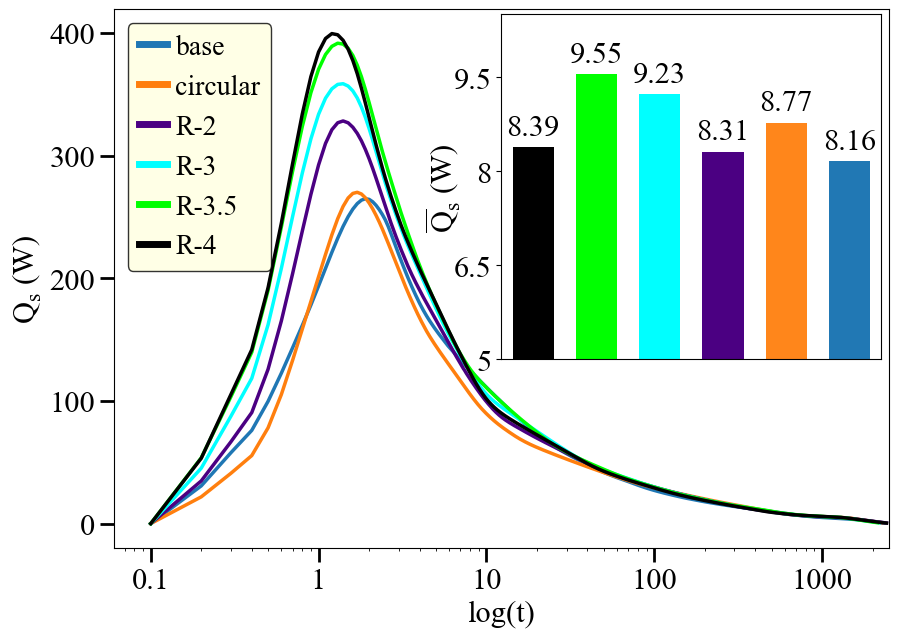

In [35]:
# Set font properties
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'normal'

# Increase figure size for better visibility
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the lines for different datasets
offset = 0.1  # Define a small offset value
sns.lineplot(x=my_file2['flow-time'] + offset, y=my_file2['heat-storage-rate-flux'], label='base', linewidth=2.5)
sns.lineplot(x=my_file4['flow-time'] + offset, y=my_file4['heat-storage-rate'], label='circular', linewidth=2.5)
sns.lineplot(x=my_file10['flow-time'] + offset, y=my_file10['heat-storage-rate'], label='R-2', linewidth=2.5, color='indigo')
sns.lineplot(x=my_file11['flow-time'] + offset, y=my_file11['heat-storage-rate'], label='R-3', linewidth=2.5, color='aqua')
sns.lineplot(x=my_file12['flow-time'] + offset, y=my_file12['heat-storage-rate'], label='R-3.5', linewidth=2.5, color='lime')
sns.lineplot(x=my_file13['flow-time'] + offset, y=my_file13['heat-storage-rate'], label='R-4', linewidth=2.5, color='black')

# Set x-axis to logarithmic scale
ax.set_xscale('log')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:g}'))
ax.tick_params(length=10, width=2)
ax.set_xlabel(r'log(t)')
ax.set_ylabel(r'$\mathregular{Q_{s}}$ (W)')
ax.set_xlim(0, 2500)

# Legend customization
legend = plt.legend(title='', loc='upper left', handlelength=1, handletextpad=0.3, fontsize=20, facecolor='lightyellow', frameon=True, edgecolor='black')
for line in legend.get_lines():
    line.set_linewidth(5)

# Create an inset axes for the vertical bar chart
rect = ax.get_position()  # Get the position of the main axes
inset_left = rect.x0 + 0.5 * rect.width  # Adjust horizontally
inset_bottom = rect.y0 + 0.35 * rect.height  # Adjust vertically
inset_width = 0.49 * rect.width  # Width
inset_height = 0.64 * rect.height  # Height
ax_inset = fig.add_axes([inset_left, inset_bottom, inset_width, inset_height])

# Data for the inset vertical bar plot
datasets = ['R-4', 'R-3.5', 'R-3', 'R-2', 'Circular', 'Base']
ut_values = [8.386, 9.552, 9.227, 8.315, 8.773, 8.163]

# Plot vertical bar chart
bars = ax_inset.bar(datasets, ut_values, width=0.65, color=['#000000', '#00ff00', '#00ffff', '#4b0082', '#ff861b','#2178b4'])

# Annotate bars with values
for bar, value in zip(bars, ut_values):
    ax_inset.text(bar.get_x() + bar.get_width() / 2, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=22, color='black')

from matplotlib.ticker import FuncFormatter

# Set axes properties for the inset
ax_inset.set_ylabel(r'$\mathregular{\overline{Q}_{s}}$ (W)', fontsize=22, labelpad=5)  # Reduce labelpad to decrease distance
ax_inset.yaxis.set_label_coords(-0.1, 0.5)  # (x, y) coordinates: x adjusts horizontal position

ax_inset.set_xlim(-0.5, len(datasets) - 0.5)  # Adjust x-axis limits to fit all bars
ax_inset.set_ylim(5, 10.5)  # Set y-axis range
ax_inset.set_yticks([5, 6.5, 8, 9.5])  # Set specific y-axis tick values

# Prevent decimals in tick labels for integers
ax_inset.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}' if x.is_integer() else f'{x:.1f}'))

# Hide x-ticks and labels
ax_inset.set_xticks(range(len(datasets)))  # Set correct positions for x-axis ticks
ax_inset.set_xticklabels([])  # Hide x-axis labels
ax_inset.tick_params(axis='x', length=0)
ax_inset.tick_params(axis='y', labelsize=22)  # Customize tick parameters for y-axis
# Save the figure and show the plot
plt.savefig('heat-storage-full-with-bar2.png', dpi=400, bbox_inches='tight')
plt.show()


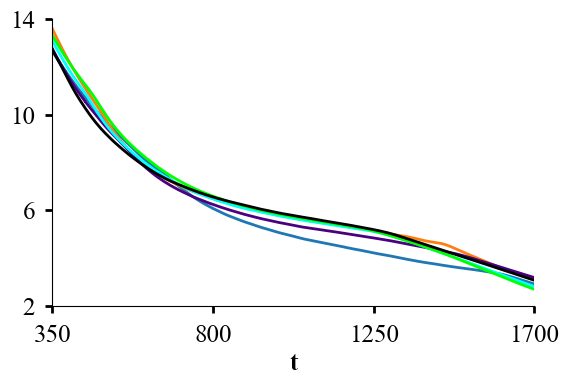

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn figure with custom size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

plt.figure(figsize=(6.22, 3.73))

# Plot the lines for different datasets
sns.lineplot(x=my_file2['flow-time'], 
             y=my_file2['heat-storage-rate-flux'], 
             label='base ($\overline{Q}_{S}$ = 8.163)',
             linewidth=2)

sns.lineplot(x=my_file4['flow-time'], 
             y=my_file4['heat-storage-rate'], 
             label='circular ($\overline{Q}_{S}$ = 8.774)',
             linewidth=2)
sns.lineplot(x=my_file10['flow-time'], 
             y=my_file10['heat-storage-rate'], 
             label='R-2 ($\overline{Q}_{S}$ = 8.315)',
             linewidth=2,
             color='indigo')

sns.lineplot(x=my_file11['flow-time'], 
             y=my_file11['heat-storage-rate'], 
             label='R-3 ($\overline{Q}_{S}$ = 9.227)',
             linewidth=2,
             color='aqua')

sns.lineplot(x=my_file12['flow-time'], 
             y=my_file12['heat-storage-rate'], 
             label='R-3.5 ($\overline{Q}_{S}$ = 9.522)',
             linewidth=2,
             color='lime')

sns.lineplot(x=my_file13['flow-time'], 
             y=my_file13['heat-storage-rate'], 
             label='R-4 ($\overline{Q}_{S}$ = 8.386)',
             linewidth=2,
             color='black')

# Set x-axis to logarithmic scale



# Add title and labels

plt.xlabel('t', fontweight='bold')
plt.ylabel('')
y_ticks = np.linspace(2, 14, 4)
plt.yticks(y_ticks)

x_ticks = np.linspace(350, 1700, 4)  # Adjust the number of ticks as needed
plt.xticks(x_ticks)
plt.tick_params(axis='x',length=5, width=2, pad=7.5)  # Increase pad to move x-axis numbers down
plt.tick_params(axis='y',length=5, width=2, pad=7.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)







plt.xlim(350,1700)
plt.ylim(2, 14)

# Customize the legend
plt.legend().remove()
plt.savefig('heat-s-2.png', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()



In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter, LogLocator
from PIL import Image


img = Image.open('heat-storage-full-with-bar2.png')
img.save('hast2.bmp', format='bmp')